In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 585.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/AWEDataset/awe'
os.chdir(path)

In [ ]:
print(os.listdir(path))

['rights.txt', 'lefts.txt', 'train.txt', 'test.txt', 'distr.mat', '005', '003', '002', '010', '004', '007', '001', '006', '008', '009', '015', '013', '011', '012', '017', '016', '020', '019', '014', '018', '027', '024', '025', '028', '022', '026', '029', '023', '021', '030', '035', '039', '034', '031', '037', '038', '033', '032', '036', '040', '045', '049', '042', '043', '048', '046', '041', '050', '047', '044', '055', '056', '052', '059', '054', '060', '053', '057', '058', '051', '070', '066', '067', '065', '061', '062', '063', '064', '068', '069', '077', '078', '071', '079', '072', '076', '073', '080', '074', '075', '085', '086', '081', '087', '082', '083', '089', '090', '084', '088', '100', '091', '095', '094', '096', '097', '092', '099', '093', '098']


In [ ]:
file_path = []
for x in os.listdir(path):
    if os.path.isdir(x):
        data_path = os.path.join(path, x)
        file_path.append(data_path)
print(file_path[:5])  # Show first 5 for brevity

['/content/drive/My Drive/AWEDataset/awe/005', '/content/drive/My Drive/AWEDataset/awe/003', '/content/drive/My Drive/AWEDataset/awe/002', '/content/drive/My Drive/AWEDataset/awe/010', '/content/drive/My Drive/AWEDataset/awe/004']


In [ ]:
for x in os.listdir(file_path[0]):
    if x.split('.')[-1] == 'png':
        print(x)

01.png
02.png
03.png
04.png
05.png
06.png
07.png
08.png
10.png
09.png


In [ ]:
print(os.listdir(file_path[0]))

['01.png', '02.png', '03.png', '04.png', '05.png', '06.png', '07.png', '08.png', '10.png', '09.png']


In [ ]:
for i in range(len(file_path)):
    folder_name = file_path[i].split('/')[-1]
    count = len(os.listdir(file_path[i]))
    print(f"Folder-> {folder_name}")
    print(f"Count-> {count}\n")

Folder-> 005
Count-> 10

Folder-> 003
Count-> 10

Folder-> 002
Count-> 10

Folder-> 010
Count-> 10

Folder-> 004
Count-> 10

Folder-> 007
Count-> 10

Folder-> 001
Count-> 10

Folder-> 006
Count-> 10

Folder-> 008
Count-> 10

Folder-> 009
Count-> 10

Folder-> 015
Count-> 10

Folder-> 013
Count-> 10

Folder-> 011
Count-> 10

Folder-> 012
Count-> 10

Folder-> 017
Count-> 10

Folder-> 016
Count-> 10

Folder-> 020
Count-> 10

Folder-> 019
Count-> 10

Folder-> 014
Count-> 10

Folder-> 018
Count-> 10

Folder-> 027
Count-> 10

Folder-> 024
Count-> 10

Folder-> 025
Count-> 10

Folder-> 028
Count-> 10

Folder-> 022
Count-> 10

Folder-> 026
Count-> 10

Folder-> 029
Count-> 10

Folder-> 023
Count-> 10

Folder-> 021
Count-> 10

Folder-> 030
Count-> 10

Folder-> 035
Count-> 10

Folder-> 039
Count-> 10

Folder-> 034
Count-> 10

Folder-> 031
Count-> 10

Folder-> 037
Count-> 10

Folder-> 038
Count-> 10

Folder-> 033
Count-> 10

Folder-> 032
Count-> 10

Folder-> 036
Count-> 10

Folder-> 040
Count-> 10



In [ ]:
exists = os.path.exists('/content/drive/My Drive/AWEDataset/awe')
print(exists)

True


In [ ]:
gen_6 = ImageDataGenerator(rotation_range=3, horizontal_flip=True, fill_mode='nearest')
for path in file_path:
    for img_file in os.listdir(path):
        if img_file.split('.')[-1] == 'png':
            img_path = os.path.join(path, img_file)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            prefix = path.split('/')[-1]
            i = 1
            for batch in gen_6.flow(x, batch_size=1, save_to_dir=path, save_prefix=prefix, save_format='png'):
                i += 1
                if i > 9:
                    break

In [ ]:
print(len(os.listdir(file_path[0])))

100


In [ ]:
import os
import shutil
import random

base_path = '/content/drive/My Drive/AWEDataset/awe'
output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

print("Directories created:", os.listdir(output_dir))

Directories created: ['train', 'val', 'test']


In [ ]:
file_dict = {}
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        file_dict[folder] = [os.path.join(folder_path, f) for f in png_files]

print(f"Total classes found: {len(file_dict)}")
print(f"Files in class 001: {len(file_dict.get('001', []))}")

Total classes found: 101
Files in class 001: 100


In [ ]:
random.seed(7)  # For reproducibility
train_files = []
val_files = []
test_files = []

for class_name, files in file_dict.items():
    random.shuffle(files)
    train_count = int(len(files) * 0.7)
    val_count = int(len(files) * 0.2)
    test_count = len(files) - train_count - val_count  # Remainder to test

    train_files.extend(files[:train_count])
    val_files.extend(files[train_count:train_count + val_count])
    test_files.extend(files[train_count + val_count:])

print(f"Train files: {len(train_files)}")
print(f"Val files: {len(val_files)}")
print(f"Test files: {len(test_files)}")

Train files: 6951
Val files: 1960
Test files: 1040


In [ ]:
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)

print("Splitting complete!")
print(f"Train classes: {len(os.listdir(train_dir))}")
print(f"Files in train/001: {len(os.listdir(os.path.join(train_dir, '001')))}")

Splitting complete!
Train classes: 100
Files in train/001: 70


In [ ]:
print(f"Total train files: {sum(len(os.listdir(os.path.join(train_dir, d))) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d)))}")
print(f"Total val files: {sum(len(os.listdir(os.path.join(val_dir, d))) for d in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, d)))}")
print(f"Total test files: {sum(len(os.listdir(os.path.join(test_dir, d))) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d)))}")

Total train files: 6951
Total val files: 1960
Total test files: 1040


In [ ]:
train_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/train'
valid_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/val'
test_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/test'

print(os.listdir(train_path)[:5])  # Check first 5 class folders

['005', '003', '002', '010', '004']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
train_ds = train_gen.flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=32)

valid_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
valid_ds = valid_gen.flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=32)

test_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_ds = test_gen.flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=32, shuffle=False)

Found 6951 images belonging to 100 classes.
Found 1960 images belonging to 100 classes.
Found 1040 images belonging to 100 classes.


In [ ]:
# Assuming train_ds is already defined from your previous step
imgs, labels = next(train_ds)
print(f"Images shape: {imgs.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (32, 224, 224, 3)
Labels shape: (32, 100)


In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr[:10], axes):  # Limit to first 10 images
        # Reverse VGG19 preprocessing for display: add mean and clip to [0, 255]
        img_display = img + [123.68, 116.779, 103.939]  # VGG19 mean RGB values
        img_display = np.clip(img_display, 0, 255).astype(np.uint8)
        ax.imshow(img_display)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

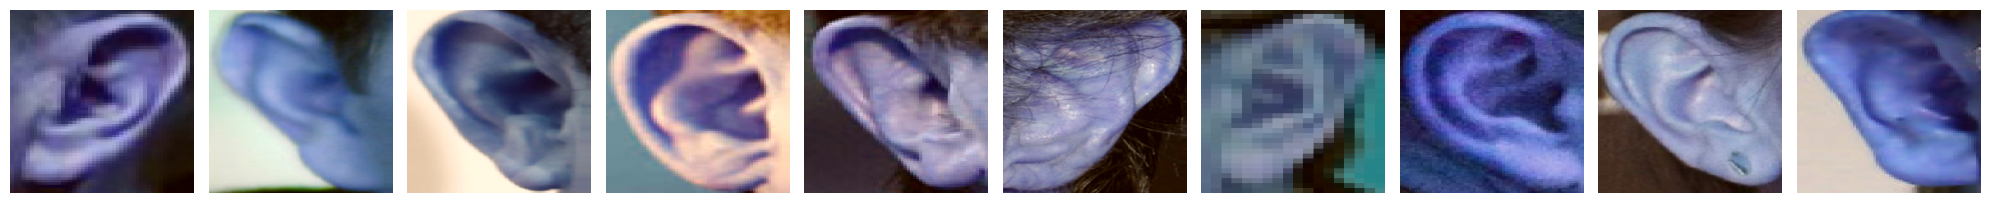

One-hot encoded labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
plotImages(imgs)
print("One-hot encoded labels:")
print(labels[:10])  # Print first 10 for brevity

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,862,471 (18.55 MB)

 Trainable params: 812,900 (3.10 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [ ]:
import os
import re

path = "/content/drive/My Drive/AWEDataset/awe"
file_dict = {}
for folder in os.listdir(path):
    if re.match(r'^\d{3}$', folder):  # Only include folders with exactly three digits
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
            file_dict[folder] = [os.path.join(folder_path, f) for f in png_files]

In [ ]:
file_dict_10 = {k: v for k, v in file_dict.items() if int(k) <= 10}
print(f"Total classes (10): {len(file_dict_10)}")
print(f"Files in 001: {len(file_dict_10.get('001', []))}")

Total classes (10): 10
Files in 001: 100


In [ ]:
import random

random.seed(7)  # For reproducibility
train_files = []
val_files = []
test_files = []

for class_name, files in file_dict_10.items():
    random.shuffle(files)  # Shuffle files within each class
    train_count = int(len(files) * 0.7)
    val_count = int(len(files) * 0.2)
    test_count = len(files) - train_count - val_count

    train_files.extend(files[:train_count])
    val_files.extend(files[train_count:train_count + val_count])
    test_files.extend(files[train_count + val_count:])

print(f"Train files: {len(train_files)}")
print(f"Val files: {len(val_files)}")
print(f"Test files: {len(test_files)}")

Train files: 696
Val files: 196
Test files: 104


In [ ]:
import shutil

output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Create directories if they don’t exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy files to their respective directories
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class name (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)

# Verify with a quick check
!ls "/content/drive/My Drive/AWEDataset/awe/Split_Data/train/001"

001_0_1128.png	001_0_3141.png	001_0_4809.png	001_0_6618.png	001_0_838.png	001_0_9648.png
001_0_124.png	001_0_3351.png	001_0_4965.png	001_0_6658.png	001_0_8483.png	001_0_9754.png
001_0_136.png	001_0_3557.png	001_0_5165.png	001_0_6670.png	001_0_865.png	001_0_9789.png
001_0_1376.png	001_0_3669.png	001_0_5446.png	001_0_6844.png	001_0_8751.png	02.png
001_0_1486.png	001_0_3896.png	001_0_578.png	001_0_6998.png	001_0_8909.png	04.png
001_0_2146.png	001_0_4031.png	001_0_5825.png	001_0_7016.png	001_0_8961.png	05.png
001_0_2252.png	001_0_4247.png	001_0_5905.png	001_0_7762.png	001_0_8993.png	07.png
001_0_2523.png	001_0_4265.png	001_0_6012.png	001_0_7966.png	001_0_9006.png	08.png
001_0_2712.png	001_0_4363.png	001_0_6067.png	001_0_8110.png	001_0_9219.png	09.png
001_0_2793.png	001_0_4614.png	001_0_620.png	001_0_819.png	001_0_935.png	10.png
001_0_2827.png	001_0_4742.png	001_0_6298.png	001_0_8277.png	001_0_9489.png
001_0_2941.png	001_0_4750.png	001_0_6311.png	001_0_8282.png	001_0_9535.png


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Training generator with augmentation
train_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test generators (no augmentation, just preprocessing)
valid_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

# Create data flows
train_ds = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),  # EfficientNetB0 input size
    batch_size=32,
    class_mode='categorical'
)

valid_ds = valid_gen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_ds = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)

Found 6951 images belonging to 100 classes.
Found 1960 images belonging to 100 classes.
Found 1040 images belonging to 100 classes.


In [ ]:
import shutil
import os

# Define paths
output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Clear existing Split_Data
shutil.rmtree(output_dir, ignore_errors=True)

# Recreate directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Assuming train_files, val_files, test_files are lists of file paths for the 10 classes
# Example: train_files = ['/path/to/001/image1.png', '/path/to/002/image2.png', ...]
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class name (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)

# Set up the generators (unchanged from your original code)
train_ds = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_ds = valid_gen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_ds = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 696 images belonging to 10 classes.
Found 196 images belonging to 10 classes.
Found 104 images belonging to 10 classes.


In [ ]:
# Check the number of classes detected by the generator
print("Train classes:", train_ds.class_indices)
print("Number of train classes:", len(train_ds.class_indices))

# Check the shape of the labels
for imgs, labels in train_ds:
    print("Labels shape:", labels.shape)  # Should be (32, 10)
    break

Train classes: {'001': 0, '002': 1, '003': 2, '004': 3, '005': 4, '006': 5, '007': 6, '008': 7, '009': 8, '010': 9}
Number of train classes: 10
Labels shape: (32, 10)


In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # Stochastic Gradient Descent
    loss='categorical_crossentropy',                  # Loss for categorical labels
    metrics=['accuracy']                              # Track accuracy during training
)

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
print("Train classes:", train_ds.class_indices)
print("Number of train classes:", len(train_ds.class_indices))
for imgs, labels in train_ds:
    print("Labels shape:", labels.shape)  # Should be (32, 10)
    break

Train classes: {'001': 0, '002': 1, '003': 2, '004': 3, '005': 4, '006': 5, '007': 6, '008': 7, '009': 8, '010': 9}
Number of train classes: 10
Labels shape: (32, 10)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

# Get the output of the second-to-last layer
last_layer = model.layers[-2].output
# Replace the output layer with one for 10 classes
new_output = Dense(10, activation='softmax')(last_layer)
# Create a new model
new_model = Model(inputs=model.input, outputs=new_output)

# Compile the new model
from tensorflow.keras.optimizers import SGD
new_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = new_model.fit(
    train_ds,
    epochs=50,
    validation_data=valid_ds,
    callbacks=[lr_schedule, early_stopping, checkpoint]
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1296 - loss: 13.0843

22/22 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.1308 - loss: 13.0742 - val_accuracy: 0.3265 - val_loss: 12.2649 - learning_rate: 0.0100
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2875 - loss: 11.9639

22/22 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.2882 - loss: 11.9541 - val_accuracy: 0.4286 - val_loss: 11.2046 - learning_rate: 0.0100
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4018 - loss: 10.9069

22/22 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.4023 - loss: 10.8970 - val_accuracy: 0.5918 - val_loss: 10.1061 - learning_rate: 0.0100
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.4878 - loss: 9.9214 - val_accuracy: 0.5510 - val_loss: 9.1562 - learning_rate: 0.0100
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5920 - loss: 8.9786

22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.5921 - loss: 8.9706 - val_accuracy: 0.7398 - val_loss: 8.2175 - learning_rate: 0.0100
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6555 - loss: 8.1812

22/22 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.6565 - loss: 8.1738 - val_accuracy: 0.7500 - val_loss: 7.5179 - learning_rate: 0.0100
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.7186 - loss: 7.4784 - val_accuracy: 0.7449 - val_loss: 6.8795 - learning_rate: 0.0100
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7342 - loss: 6.8557

22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.7351 - loss: 6.8488 - val_accuracy: 0.8418 - val_loss: 6.2830 - learning_rate: 0.0100
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8392 - loss: 6.1842

22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8385 - loss: 6.1801 - val_accuracy: 0.8980 - val_loss: 5.7005 - learning_rate: 0.0100
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8245 - loss: 5.6908 - val_accuracy: 0.8827 - val_loss: 5.2703 - learning_rate: 0.0100
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8320 - loss: 5.3147 - val_accuracy: 0.8827 - val_loss: 4.8579 - learning_rate: 0.0100
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8769 - loss: 4.8470 - val_accuracy: 0.8929 - val_loss: 4.5208 - learning_rate: 0.0100
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8862 - loss: 4.4681 - val_accuracy: 0.8571 - val_loss: 4.2172 - learning_rate: 0.0100
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8783 - loss: 4.1816

22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8786 - loss: 4.1776 - val_accuracy: 0.9133 - val_loss: 3.8804 - learning_rate: 0.0100
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8928 - loss: 3.8780

22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.8929 - loss: 3.8744 - val_accuracy: 0.9541 - val_loss: 3.5364 - learning_rate: 0.0100
Epoch 16/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9010 - loss: 3.5456

22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9012 - loss: 3.5435 - val_accuracy: 0.9745 - val_loss: 3.2903 - learning_rate: 0.0100
Epoch 17/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8883 - loss: 3.3686 - val_accuracy: 0.9745 - val_loss: 3.0885 - learning_rate: 0.0100
Epoch 18/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9200 - loss: 3.0797 - val_accuracy: 0.9694 - val_loss: 2.8255 - learning_rate: 0.0100
Epoch 19/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.8932 - loss: 2.8619 - val_accuracy: 0.9388 - val_loss: 2.6774 - learning_rate: 0.0100
Epoch 20/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8858 - loss: 2.7558 - val_accuracy: 0.9541 - val_loss: 2.4944 - learning_rate: 0.0100
Epoch 21/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8916 - loss: 2.5512 - val_accuracy: 0.9337 - val_loss: 2.3435 - learning_rate: 0.0100
Epoch 22/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9091 - loss: 2.3756 - val_accuracy: 0.949

22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9117 - loss: 2.0797 - val_accuracy: 0.9796 - val_loss: 1.8806 - learning_rate: 0.0100
Epoch 25/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9317 - loss: 1.9616

22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9318 - loss: 1.9589 - val_accuracy: 0.9949 - val_loss: 1.7543 - learning_rate: 0.0100
Epoch 26/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9367 - loss: 1.7963 - val_accuracy: 0.9694 - val_loss: 1.6790 - learning_rate: 0.0100
Epoch 27/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9169 - loss: 1.7117 - val_accuracy: 0.9847 - val_loss: 1.5795 - learning_rate: 0.0100
Epoch 28/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9495 - loss: 1.5722 - val_accuracy: 0.9796 - val_loss: 1.4819 - learning_rate: 0.0100
Epoch 29/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9552 - loss: 1.4808 - val_accuracy: 0.9643 - val_loss: 1.4127 - learning_rate: 0.0100
Epoch 30/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9136 - loss: 1.5014 - val_accuracy: 0.9745 - val_loss: 1.3252 - learning_rate: 0.0100
Epoch 31/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9340 - loss: 1.3859 - val_accuracy: 0.984

22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.9535 - loss: 0.7296 - val_accuracy: 1.0000 - val_loss: 0.6582 - learning_rate: 0.0100
Epoch 49/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9436 - loss: 0.7524 - val_accuracy: 0.9592 - val_loss: 0.6901 - learning_rate: 0.0100
Epoch 50/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9516 - loss: 0.7323 - val_accuracy: 0.9796 - val_loss: 0.6777 - learning_rate: 0.0100


In [ ]:
# Save the model in .h5 format
new_model.save('efficientnetb0_model.h5')

# Alternatively, save the model in .keras format (recommended for newer TensorFlow versions)
new_model.save('efficientnetb0_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model from .h5 file
loaded_model = load_model('efficientnetb0_model.h5')

# Alternatively, load from .keras file
# loaded_model = load_model('efficientnetb0_model.keras')

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = new_model.evaluate(test_ds)

# Print the results
print(f"Test Loss: {test_loss*100}")
print(f"Test Accuracy: {test_accuracy*100}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9847 - loss: 0.6445
Test Loss: 63.83882761001587
Test Accuracy: 99.03846383094788


In [ ]:
import numpy as np

# Get predictions for the test dataset
predictions = new_model.predict(test_ds)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_classes = test_ds.classes

# Print some predictions and true labels for comparison
print("Predicted classes:", predicted_classes[:10])
print("True classes:", true_classes[:10])

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step
Predicted classes: [0 0 0 0 0 7 0 0 0 0]
True classes: [0 0 0 0 0 0 0 0 0 0]


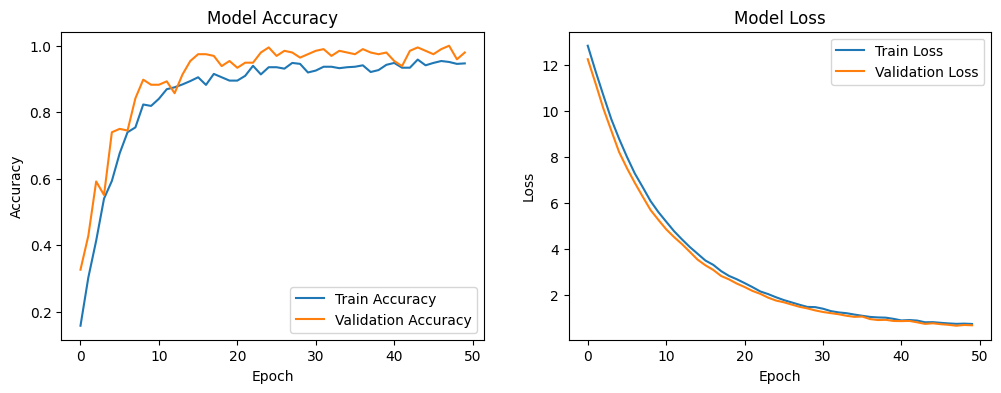

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Import necessary libraries
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
import numpy as np

# Step 1: Define the EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model to use pretrained weights

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)  # Reduce spatial dimensions
x = Dense(512, activation='relu')(x)             # Fully connected layer
x = Dropout(0.5)(x)                              # Dropout for regularization
x = Dense(256, activation='relu')(x)             # Another fully connected layer
x = Dropout(0.5)(x)                              # Additional dropout
x = Dense(10, activation='softmax')(x)           # Output layer (adjust 10 to your number of classes)

# Create the final model
model_1 = Model(inputs=base_model.input, outputs=x)

# Step 2: Compile the model
model_1.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD optimizer
    loss='categorical_crossentropy',                  # Loss for multi-class classification
    metrics=['accuracy']                              # Track accuracy
)

# Step 3: Make predictions on the test set
predictions = model_1.predict(test_ds, steps=len(test_ds), verbose=0)

# Step 4: Print the predicted class labels
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model('efficientnetb0_model.h5')

# Make predictions
predictions = model_1.predict(test_ds, steps=len(test_ds), verbose=0)
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
0
4
0
4
4
4
4
4
5
5
5
5
5
5
0
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
